## Titanic - Machine Learning from Disaster (Classification) (Kaggle Project)

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Warning
import warnings

### Outline
#### 1. Checking Data
#### 2. Exploratory Data Analysis
#### 3. Feature Engineering
#### 4. Encoding and Normalization
#### 5. Modeling
#### 6. Prediction

## 1. Checking Data

In [2]:
# Read train
train = pd.read_csv('train.csv')

In [3]:
# Read test
test = pd.read_csv('test.csv')

In [4]:
# First 5 rows (train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# First 5 rows (test)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Shape
train.shape, test.shape

((891, 12), (418, 11))

In [7]:
# Basic information of train and test
train.info()
print('')
print("##"*40)
print('')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

################################################################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------   

<font size=4>Features: </font><br>
<font size=4>-Survived: Survival <font color=red>(Categorical)</font></font><br>
<font size=4>-Pclass: Ticket class <font color=red>(Categorical)</font></font><br>
<font size=4>-Name: Name of each passenger <font color=red>(Categorical)</font></font><br>
<font size=4>-Sex: Sex <font color=red>(Categorical)</font></font><br>
<font size=4>-Age: Age in years <font color=blue>(Numerical)</font></font><br>
<font size=4>-SibSp: # of siblings/ spouses aboard Titanic <font color=blue>(Numerical)</font></font><br>
<font size=4>-Parch: # of parents/ children aboard Titanic <font color=blue>(Numerical)</font></font><br>
<font size=4>-Ticket: Ticket number <font color=red>(Categorical)</font></font><br>
<font size=4>-Fare: Passenger fare <font color=blue>(Numerical)</font></font><br>
<font size=4>-Cabin: Cabin number <font color=red>(Categorical)</font></font><br>
<font size=4>-Embarked: Port of Embarkation <font color=red>(Categorical)</font></font>

In [8]:
# Summary Statistic (Numerical) (Train)
train[['Age', 'SibSp', 'Parch', 'Fare']].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [9]:
# Summary Statistic (Numerical) (Test)
test[['Age', 'SibSp', 'Parch', 'Fare']].describe()

,Age,SibSp,Parch,Fare
count,332.000000,418.000000,418.000000,417.000000
mean,30.272590,0.447368,0.392344,35.627188
std,14.181209,0.896760,0.981429,55.907576
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,27.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.500000
max,76.000000,8.000000,9.000000,512.329200


In [10]:
# Summary Statistic (Categorical) (Train)
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Moen, Mr. Sigurd Hansen",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
# Summary Statistic (Categorical) (Test)
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Moubarek, Mrs. George (Omine Amenia"" Alexander)""",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [12]:
# Value count of 'Survived' in Train
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
# Value count of 'Pclass' in Train
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
# Value count of 'Pclass' in Test
test['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

<font size=4>Check the missing data in train set.</font>

In [15]:
# No. of missing data in train
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
print("The percentage of missing data of Cabin in Train is", 
      ((train['Cabin'].isnull().sum())/train.shape[0])*100)
print("")
print("The percentage of missing data of Age in Train is", 
      ((train['Age'].isnull().sum())/train.shape[0])*100)
print("")
print("The percentage of missing data of Embarked in Train is", 
      ((train['Embarked'].isnull().sum())/train.shape[0])*100)

The percentage of missing data of Cabin in Train is 77.10437710437711

The percentage of missing data of Age in Train is 19.865319865319865

The percentage of missing data of Embarked in Train is 0.22446689113355783


<font size=4>Check the missing data in test set.</font>

In [17]:
# No. of missing data in test
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
print("The percentage of missing data of Age in Test is", 
      ((test['Age'].isnull().sum())/test.shape[0])*100)
print("")
print("The percentage of missing data of Fare in Test is", 
      ((test['Fare'].isnull().sum())/test.shape[0])*100)
print("")
print("The percentage of missing data of Cabin in Test is", 
      ((test['Cabin'].isnull().sum())/test.shape[0])*100)

The percentage of missing data of Age in Test is 20.574162679425836

The percentage of missing data of Fare in Test is 0.23923444976076555

The percentage of missing data of Cabin in Test is 78.22966507177034


<font size=4>For <font color=red>Train</font>, there are missing data in 'Cabin', 'Age', 'Embarked'.</font>
<br>
<br>
<font size=4>For <font color=red>Test</font>, there are missing data in 'Cabin', 'Age', 'Fare'.</font>

<font size=4>'PassengerId' is useless, so it is better to drop it out first.</font>

In [19]:
# Drop 'PassengerId' column
train = train.drop(columns='PassengerId', axis=1)

In [20]:
# Drop 'PassengerId' column
test = test.drop(columns='PassengerId', axis=1)

In [21]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

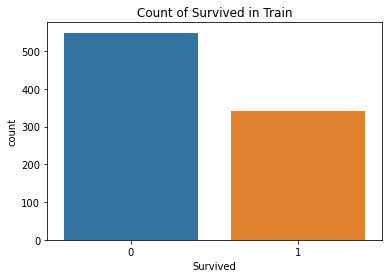

In [24]:
plt.figure(figsize=(6,4))
sns.countplot('Survived', data=train)
plt.title('Count of Survived in Train')
plt.show()

## 2. Exploratory Data Analysis

<font size=4><b>Numerical Features Analysis: </b></font><br>
<font size=4>-Age: Age in years <font color=blue>(Numerical)</font></font><br>
<font size=4>-SibSp: # of siblings/ spouses aboard Titanic <font color=blue>(Numerical)</font></font><br>
<font size=4>-Parch: # of parents/ children aboard Titanic <font color=blue>(Numerical)</font></font><br>
<font size=4>-Fare: Passenger fare <font color=blue>(Numerical)</font></font><br>

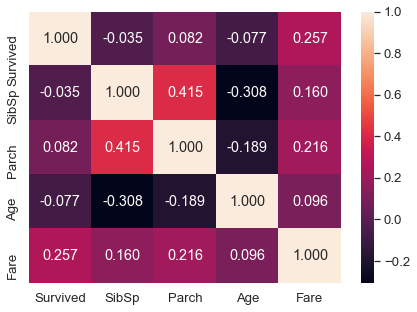

In [25]:
# Correlation of 'Survived','Age', 'SibSp', 'Parch', 'Fare' in Train Set
sns.set(font_scale=1.2)
plt.figure(figsize=(7,5))
correlation = train[['Survived','SibSp', 'Parch', 'Age', 'Fare']].corr()
sns.heatmap(correlation, annot=True, fmt = ".3f")
plt.show()

<font size=4>It seems that only 'Fare' has a significative correlation with the 'Survived' from the above correlation table, but it is too brief. We need to examinate the features further.</font>

<font size=4><b>'SibSp' Analysis</b></font>

In [26]:
# Survived Prob of SibSp
prob_SibSp = train[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean()
prob_SibSp

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


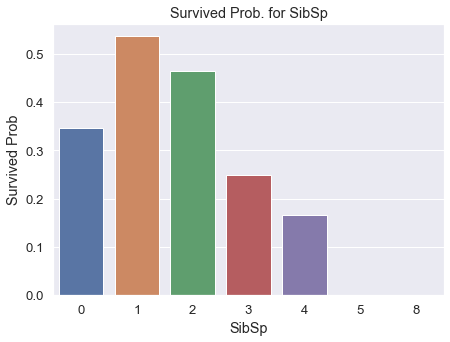

In [27]:
# Graph of Survived Prob. for SibSp
plt.figure(figsize=(7,5))
plt.title('Survived Prob. for SibSp')
sns.barplot(x=prob_SibSp['SibSp'], y=prob_SibSp['Survived'])
plt.ylabel('Survived Prob')
plt.show()

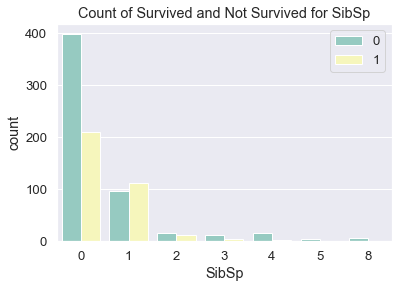

In [28]:
# Count of Survived and Not Survived for SibSp
plt.figure(figsize=(6,4))
sns.countplot('SibSp', hue='Survived', data=train, palette="Set3")
plt.title('Count of Survived and Not Survived for SibSp')
plt.legend(loc=1)
plt.show()

<font size=4>The person with more siblings/spouses has less chance to survive.</font>

<font size=4><b>'Parch' Analysis</b></font>

In [29]:
# Survived Prob of Parch
prob_Parch = train[['Parch', 'Survived']].groupby('Parch', as_index=False).mean()
prob_Parch

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


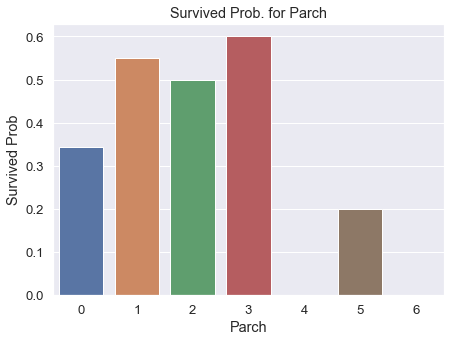

In [30]:
# Graph of Survived Prob of Parch
plt.figure(figsize=(7,5))
plt.title('Survived Prob. for Parch')
sns.barplot(x=prob_Parch['Parch'], y=prob_Parch['Survived'])
plt.ylabel('Survived Prob')
plt.show()

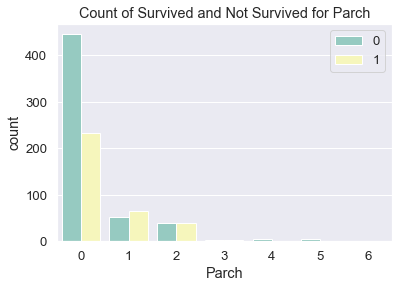

In [31]:
# Count of Survived and Not Survived for Parch
plt.figure(figsize=(6,4))
sns.countplot('Parch', hue='Survived', data=train, palette="Set3")
plt.title('Count of Survived and Not Survived for Parch')
plt.legend(loc=1)
plt.show()

<font size=4>Small families (Parch = 1, 2) are more likely to survive.</font>

<font size=4><b>'Age' (with missing data in Train and Test) Analysis</b></font>

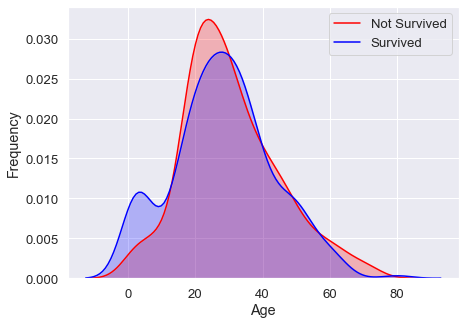

In [32]:
# Distribution of Age in Train (Survived and Not Survived)
plt.figure(figsize=(7, 5))
g = sns.kdeplot(train["Age"][(train["Survived"] == 0)], color="Red", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])
plt.show()

<font size=4>As the median is not affected by very large or very small values, replace the missing data of 'Age' in both Train and Test with median.</font>

In [33]:
# Replace the missing data in 'Age' column with median in Train
train['Age'].fillna(train['Age'].median(), inplace=True)

In [34]:
# Replace the missing data in 'Age' column with median in Test
test['Age'].fillna(test['Age'].median(), inplace=True)

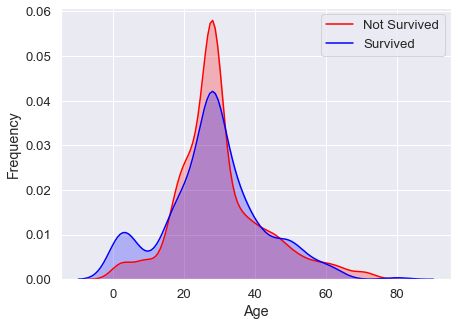

In [35]:
# # Distribution of Age in Train (Survived and Not Survived) (After fixing missing data)
plt.figure(figsize=(7, 5))
g = sns.kdeplot(train["Age"][(train["Survived"] == 0)], color="Red", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])
plt.show()

<font size=4>Cleary, there is a peak (between 0 to 5) correponsing to very young childrens.</font>

<font size=4><b>'Fare' (with missing data in Test) Analysis</b></font>

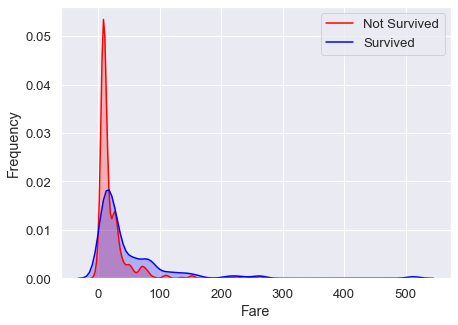

In [36]:
# Distribution of Fare in Train (Survived and Not Survived)
plt.figure(figsize=(7, 5))
g = sns.kdeplot(train["Fare"][(train["Survived"] == 0)], color="Red", shade = True)
g = sns.kdeplot(train["Fare"][(train["Survived"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel("Fare")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])
plt.show()

<font size=4>As the median is not affected by very large or very small values, replace the missing data of 'Fare' in the Test with median.</font>

In [37]:
# Replace the missing data in 'Fare' column with median in Test
test['Fare'].fillna(test['Fare'].median(), inplace=True)

<font size=4>People with higher 'Fare' are more likely to survive.</font>

<font size=4><b>Categorical Feature Analysis:</b></font><br>
<font size=4>-Pclass: Ticket class <font color=red>(Categorical)</font></font><br>
<font size=4>-Name: Name of each passenger <font color=red>(Categorical)</font></font><br>
<font size=4>-Sex: Sex <font color=red>(Categorical)</font></font><br>
<font size=4>-Ticket: Ticket number <font color=red>(Categorical)</font></font><br>
<font size=4>-Cabin: Cabin number <font color=red>(Categorical)</font></font><br>
<font size=4>-Embarked: Port of Embarkation <font color=red>(Categorical)</font></font>

<font size=4><b>'Pclass' Analysis</b></font>

In [38]:
# Survived Prob of Pclass
prob_Pclass = train[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()
prob_Pclass

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


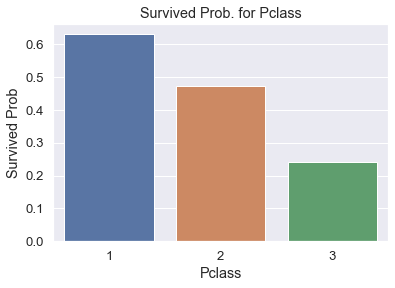

In [39]:
# Graph of Survived Prob of Pclass
plt.figure(figsize=(6,4))
plt.title('Survived Prob. for Pclass')
sns.barplot(x=prob_Pclass['Pclass'], y=prob_Pclass['Survived'])
plt.ylabel('Survived Prob')
plt.show()

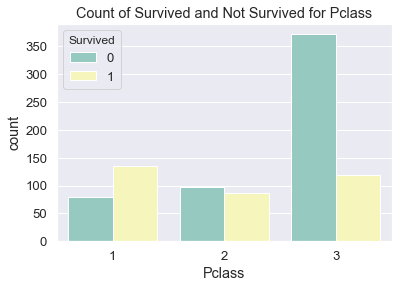

In [40]:
# Count of Survived and Not Survived for Pclass
plt.figure(figsize=(6,4))
sns.countplot('Pclass', hue='Survived', data=train, palette="Set3")
plt.title('Count of Survived and Not Survived for Pclass')
plt.show()

<font size=4>Obviously, passenger in Pclass = 1 have the highest chance to survive among others.</font>

<font size=4><b>'Sex' Analysis</b></font>

In [41]:
# Survived Prob of Sex
prob_Sex = train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()
Sex_index = prob_Sex.index
prob_Sex = prob_Sex.loc[[1,0]]
prob_Sex.index = Sex_index
prob_Sex

,Sex,Survived
0,male,0.188908
1,female,0.742038


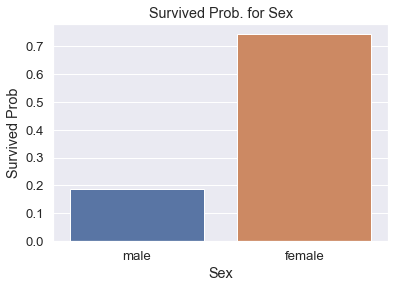

In [42]:
# Graph of Survived Prob of Sex
plt.figure(figsize=(6,4))
plt.title('Survived Prob. for Sex')
sns.barplot(x=prob_Sex['Sex'], y=prob_Sex['Survived'])
plt.ylabel('Survived Prob')
plt.show()

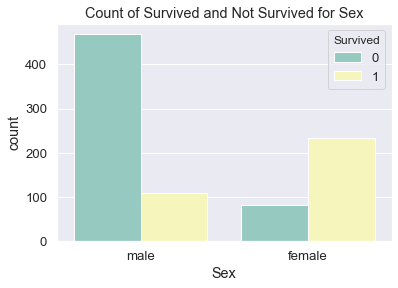

In [43]:
# Count of Survived and Not Survived for Sex
plt.figure(figsize=(6,4))
sns.countplot('Sex', hue='Survived', data=train, palette="Set3")
plt.title('Count of Survived and Not Survived for Sex')
plt.show()

<font size=4>Clearly, female will be more likely to survive.</font>

<font size=4><b>'Embarked' (with missing data in Train) Analysis</b></font>

In [44]:
# Survived Prob of Embarked
prob_Embarked = train[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean()
Embarked_index = prob_Embarked.index
prob_Embarked = prob_Embarked.loc[[2, 0, 1]]
prob_Embarked.index = Embarked_index
prob_Embarked

,Embarked,Survived
0,S,0.336957
1,C,0.553571
2,Q,0.389610


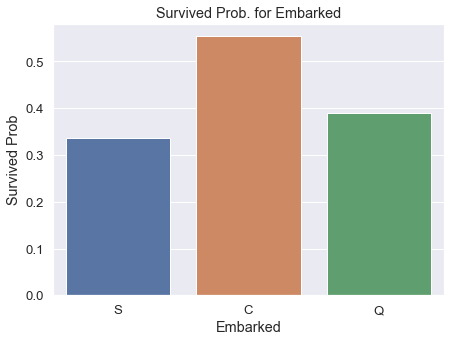

In [45]:
# Graph of Survived Prob of Embarked
plt.figure(figsize=(7,5))
plt.title('Survived Prob. for Embarked')
sns.barplot(x=prob_Embarked['Embarked'], y=prob_Embarked['Survived'])
plt.ylabel('Survived Prob')
plt.show()

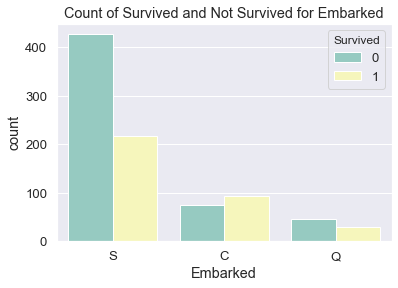

In [46]:
# Count of Survived and Not Survived for Embarked
plt.figure(figsize=(6,4))
sns.countplot('Embarked', hue='Survived', data=train, palette="Set3")
plt.title('Count of Survived and Not Survived for Embarked')
plt.show()

<font size=4>People from Cherbourg (C) have more chance to survive.</font>

In [47]:
# Value count
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<font size=4>Replace the missing data of 'Embarked' in the Test with mode.</font>

In [48]:
# Replace the missing data in 'Fare' column with median in Test
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

<font size=4>Except <font color=red>'Cabin'</font>, no missing data in both Train and Test.</font>

In [49]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [50]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

<font size=4>'Name', 'Cabin' and 'Ticket' will be discussed in next section because of their complexities.</font>

In [51]:
# No. of different values in 'Name' column
train['Name'].nunique(), test['Name'].nunique()

(891, 418)

In [52]:
# No. of different values in 'Name' column
train['Cabin'].nunique(), test['Cabin'].nunique()

(147, 76)

In [53]:
# No. of different values in 'Ticket' column
train['Ticket'].nunique(), test['Ticket'].nunique()

(681, 363)

## 3. Feature Engineering

<font size=4><b>'Name' and 'Title' Engineering and Analysis</b></font>

<font size=4>We want to get the title from each name entry and try to find the insight.</font>

In [54]:
# Get the title from train
train_title = [name.split(',')[1].strip().split('.')[0] for name in train['Name']]
train['Title'] = pd.Series(train_title)

In [55]:
# Get the title from test
test_title = [name.split(',')[1].strip().split('.')[0] for name in test['Name']]
test['Title'] = pd.Series(test_title)

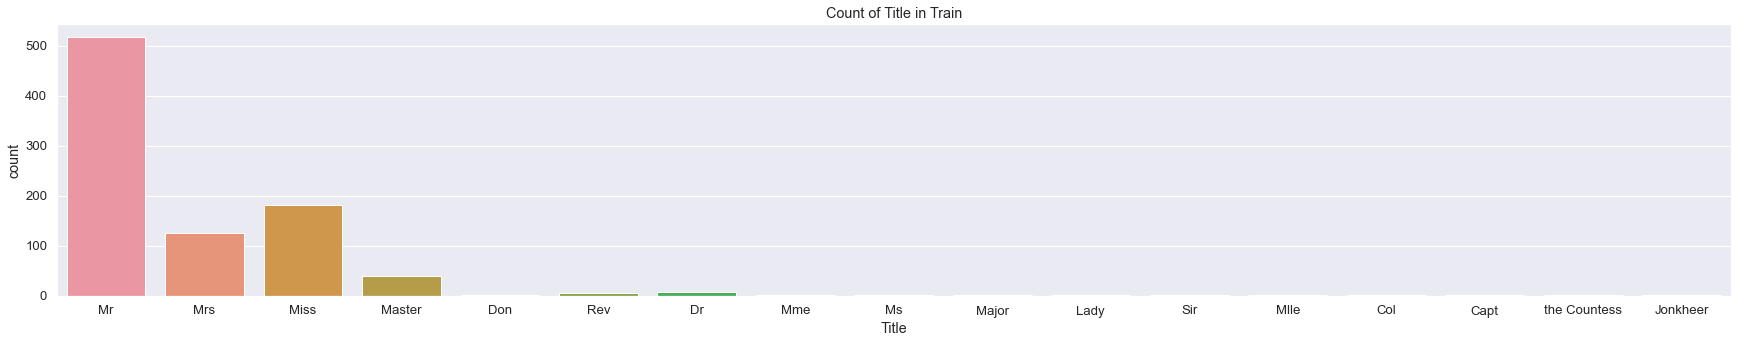

In [56]:
# Count of Title in Train
plt.figure(figsize=(30,5))
sns.countplot('Title', data=train)
plt.title('Count of Title in Train')
plt.show()

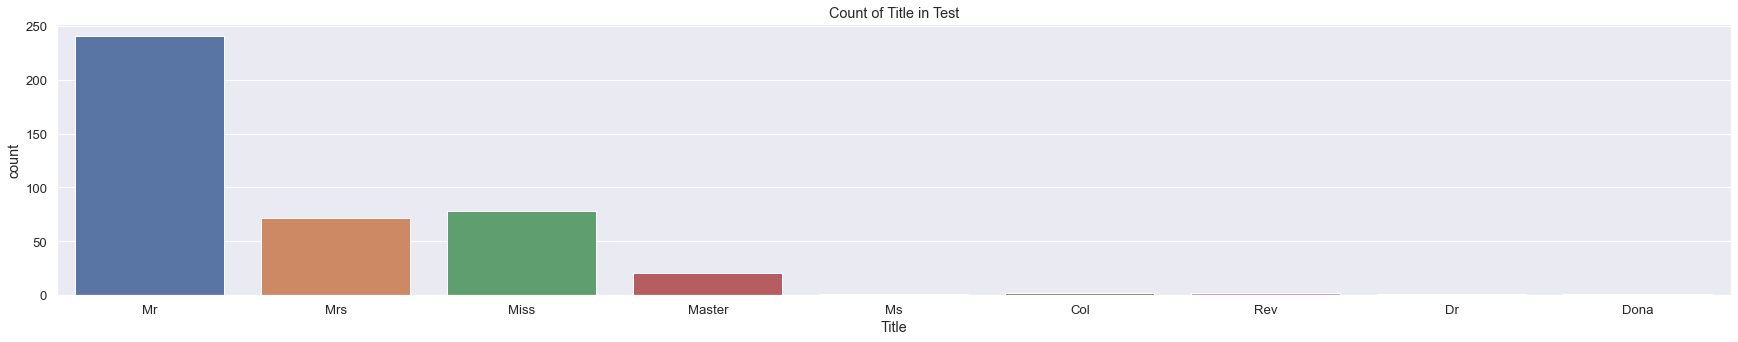

In [57]:
# Count of Title in Test
plt.figure(figsize=(30,5))
sns.countplot('Title', data=test)
plt.title('Count of Title in Test')
plt.show()

In [58]:
# Values in 'Title' of Train
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [59]:
# Values in 'Title' of Test
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

<font size=4>The above titles are divided into four groups:<br>
-'Mr'<br> 
-'Miss/Ms/Mme/Mlle/Mrs'<br>
-'Master'<br>
-'Other'</font>

In [60]:
# Adjust the Title in both sets
train['Title'] = train['Title'].replace(['Miss', 'Ms', 'Mme', 'Mlle', 'Mrs'], 'Miss/Ms/Mme/Mlle/Mrs')
test['Title'] = test['Title'].replace(['Miss', 'Ms', 'Mme', 'Mlle', 'Mrs'], 'Miss/Ms/Mme/Mlle/Mrs')

In [61]:
# Adjust the Title in both sets
train['Title'] = train['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 
                                             'Lady', 'Sir', 'the Countess', 
                                             'Don', 'Jonkheer', 'Capt', 'Dona'], 'Other')
test['Title'] = test['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 
                                             'Lady', 'Sir', 'the Countess', 
                                             'Don', 'Jonkheer', 'Capt', 'Dona'], 'Other')

In [62]:
train['Title'].value_counts()

Mr                      517
Miss/Ms/Mme/Mlle/Mrs    311
Master                   40
Other                    23
Name: Title, dtype: int64

In [63]:
test['Title'].value_counts()

Mr                      240
Miss/Ms/Mme/Mlle/Mrs    151
Master                   21
Other                     6
Name: Title, dtype: int64

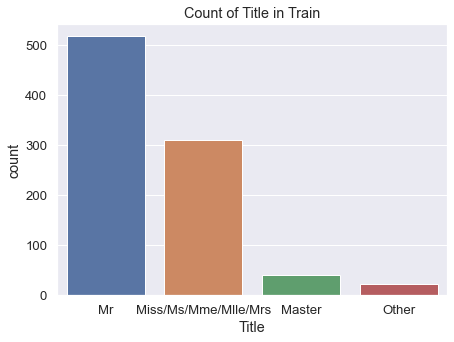

In [64]:
# Count of Title in Train (After adjustment)
plt.figure(figsize=(7,5))
sns.countplot('Title', data=train)
plt.title('Count of Title in Train')
plt.show()

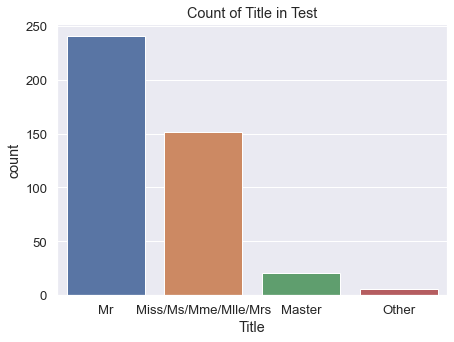

In [65]:
# Count of Title in Test (After adjustment)
plt.figure(figsize=(7,5))
sns.countplot('Title', data=test)
plt.title('Count of Title in Test')
plt.show()

In [66]:
# Survived Prob of Title
prob_Title = train[['Title', 'Survived']].groupby('Title', as_index=False).mean()
Title_index = prob_Title.index
prob_Title = prob_Title.loc[[2, 1, 0, 3]]
prob_Title.index = Title_index
prob_Title

,Title,Survived
0,Mr,0.156673
1,Miss/Ms/Mme/Mlle/Mrs,0.739550
2,Master,0.575000
3,Other,0.347826


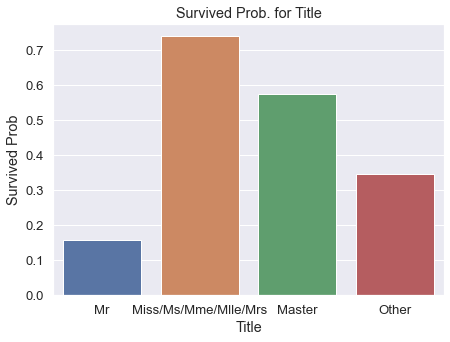

In [67]:
# Graph of Survived Prob of Title
plt.figure(figsize=(7,5))
plt.title('Survived Prob. for Title')
sns.barplot(x=prob_Title['Title'], y=prob_Title['Survived'])
plt.ylabel('Survived Prob')
plt.show()

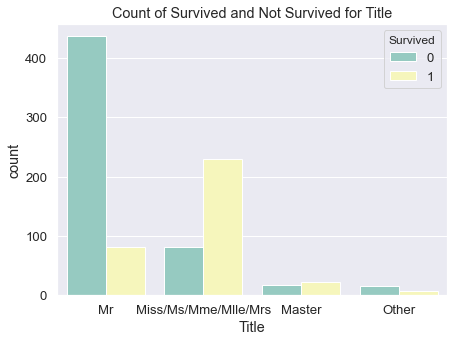

In [68]:
# Count of Survived and Not Survived for Title
plt.figure(figsize=(7,5))
sns.countplot('Title', hue='Survived' ,data=train, palette="Set3")
plt.title('Count of Survived and Not Survived for Title')
plt.show()

<font size=4>'Miss/Ms/Mme/Mlle/Mrs' has the highest chance to survive.</font>

In [69]:
# Drop the 'Name' in both sets
train = train.drop(columns = 'Name', axis = 1)
test = test.drop(columns = 'Name', axis = 1)

<font size=4><b>'Cabin' Engineering and Analysis</b></font>

<font size=4>Get the first letter from 'Cabin' and assign 'X' to missing data. Then, try to find out any insight between 'Survived'.</font>

In [70]:
# Get the first letter from 'Cabin'
# Assign 'X' to NaN
train['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train['Cabin'] ])
test['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in test['Cabin'] ])

In [71]:
train['Cabin'].value_counts()

X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [72]:
test['Cabin'].value_counts()

X    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

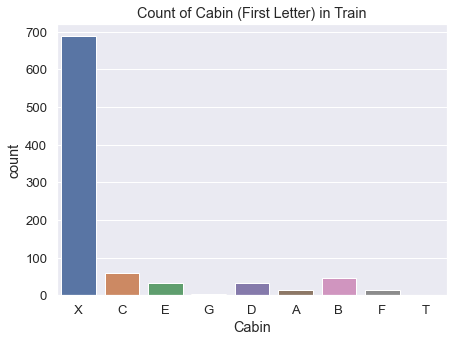

In [73]:
# Count of Cabin(First Letter) in Train
plt.figure(figsize=(7,5))
sns.countplot('Cabin', data=train)
plt.title('Count of Cabin (First Letter) in Train')
plt.show()

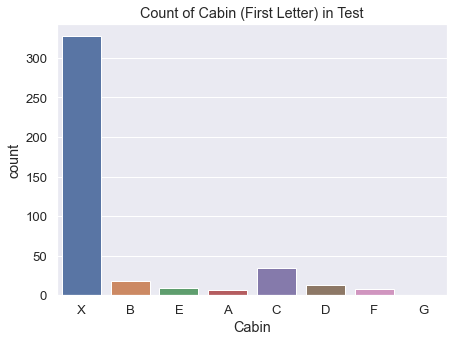

In [74]:
# Count of Cabin(First Letter) in Test
plt.figure(figsize=(7,5))
sns.countplot('Cabin', data=test)
plt.title('Count of Cabin (First Letter) in Test')
plt.show()

In [75]:
# Survived Prob of Cabin
prob_Cabin = train[['Cabin', 'Survived']].groupby('Cabin', as_index=False).mean()
prob_Cabin

,Cabin,Survived
0,A,0.466667
1,B,0.744681
2,C,0.593220
3,D,0.757576
4,E,0.750000
5,F,0.615385
6,G,0.500000
7,T,0.000000
8,X,0.299854


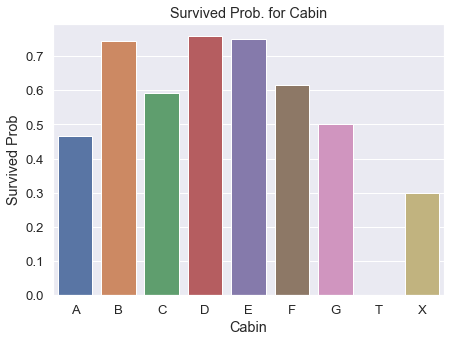

In [76]:
# Graph of Survived Prob of Title
plt.figure(figsize=(7,5))
plt.title('Survived Prob. for Cabin')
sns.barplot(x=prob_Cabin['Cabin'], y=prob_Cabin['Survived'])
plt.ylabel('Survived Prob')
plt.show()

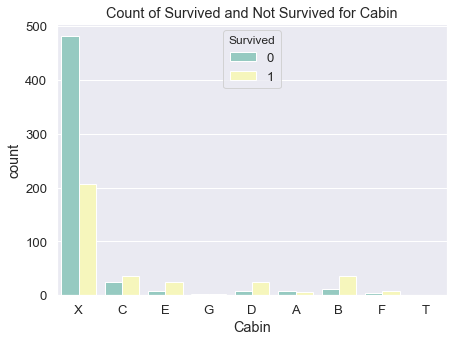

In [77]:
# Count of Survived and Not Survived for Cabin
plt.figure(figsize=(7,5))
sns.countplot('Cabin', hue='Survived' ,data=train, palette="Set3")
plt.title('Count of Survived and Not Survived for Cabin')
plt.show()

<font size=4>People with Cabin = 'X' have lower chance to survive.</font>

<font size=4><b>'Ticket' Engineering and Analysis</b></font>

<font size=4>Get the prefix from 'Ticket' and assign 'X' to entries without prefix. Then, try to find out any insight between 'Survived'.</font>

In [78]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [79]:
# Get the ticket prefix in Train
ticket_train_prefix = []
for ticket in list(train['Ticket']):
    ticket_split = ticket.split(' ')
    if len(ticket_split) > 1:
        ticket_train_prefix.append(ticket_split[0].replace(".", "").replace("/", ""))
    else:
        ticket_train_prefix.append("X")
        
train['Ticket'] = pd.Series(ticket_train_prefix)

In [80]:
# Get the ticket prefix in Test
ticket_test_prefix = []
for ticket in list(test['Ticket']):
    ticket_split = ticket.split(' ')
    if len(ticket_split) > 1:
        ticket_test_prefix.append(ticket_split[0].replace(".", "").replace("/", ""))
    else:
        ticket_test_prefix.append("X")
        
test['Ticket'] = pd.Series(ticket_test_prefix)

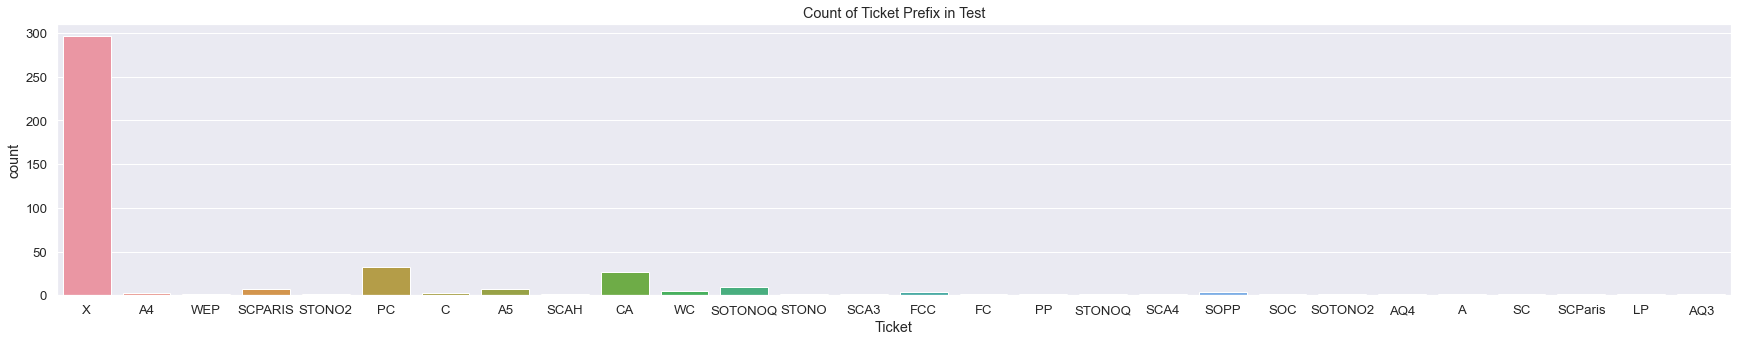

In [81]:
# Count of Ticket Prefix in Train
plt.figure(figsize=(30,5))
sns.countplot('Ticket', data=test)
plt.title('Count of Ticket Prefix in Test')
plt.show()

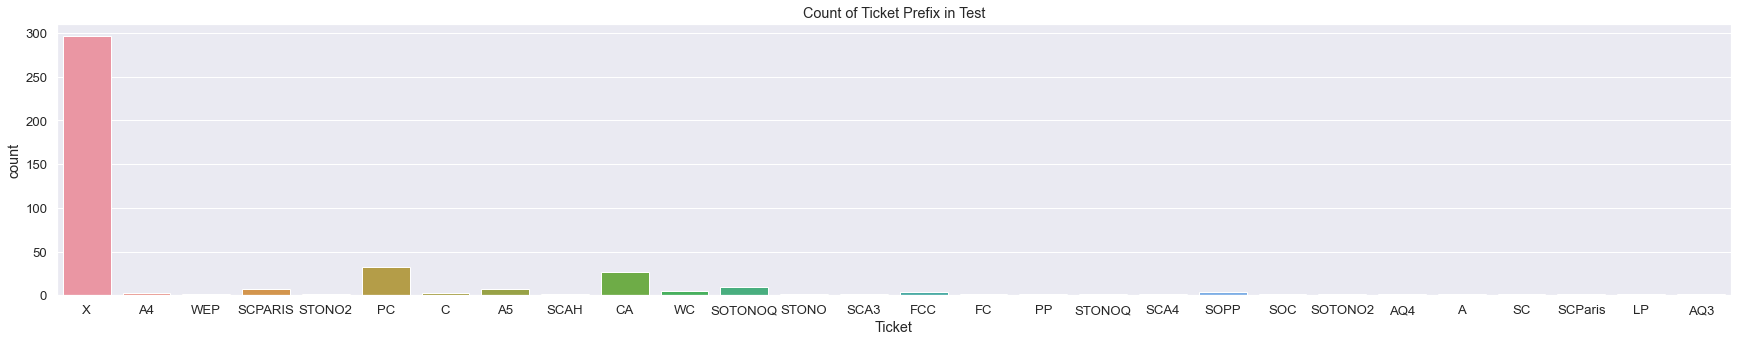

In [82]:
# Count of Ticket Prefix in Test
plt.figure(figsize=(30,5))
sns.countplot('Ticket', data=test)
plt.title('Count of Ticket Prefix in Test')
plt.show()

In [83]:
# Survived Prob of Ticket Prefix
prob_Ticket = train[['Ticket', 'Survived']].groupby('Ticket', as_index=False).mean()
prob_Ticket

,Ticket,Survived
0,A4,0.000000
1,A5,0.095238
2,AS,0.000000
3,C,0.400000
4,CA,0.341463
5,CASOTON,0.000000
6,FC,0.000000
7,FCC,0.800000
8,Fa,0.000000
9,PC,0.650000


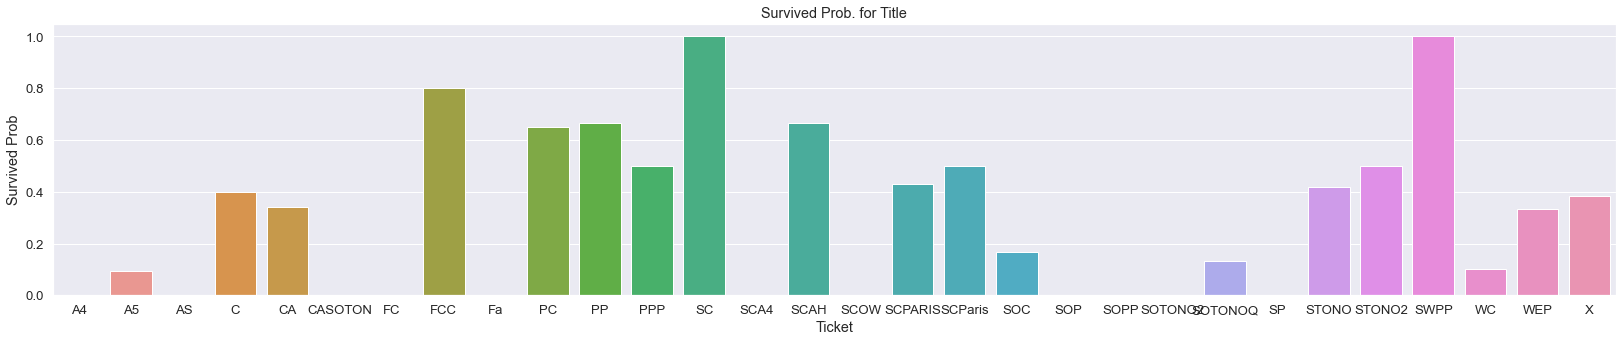

In [84]:
# Graph of Survived Prob of Ticket Prefix
plt.figure(figsize=(28,5))
plt.title('Survived Prob. for Title')
sns.barplot(x=prob_Ticket['Ticket'], y=prob_Ticket['Survived'])
plt.ylabel('Survived Prob')
plt.show()

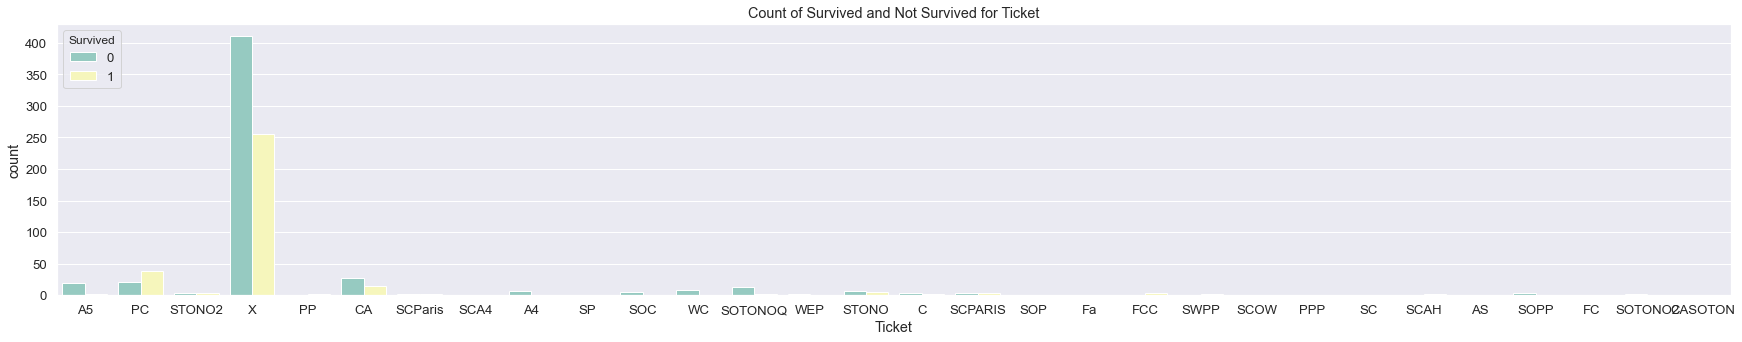

In [85]:
# Count of Survived and Not Survived for Ticket Prefix
plt.figure(figsize=(30,5))
sns.countplot('Ticket', hue='Survived' ,data=train, palette="Set3")
plt.title('Count of Survived and Not Survived for Ticket')
plt.show()

In [86]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A5,7.2500,X,S,Mr
1,1,1,female,38.0,1,0,PC,71.2833,C,C,Miss/Ms/Mme/Mlle/Mrs
2,1,3,female,26.0,0,0,STONO2,7.9250,X,S,Miss/Ms/Mme/Mlle/Mrs
3,1,1,female,35.0,1,0,X,53.1000,C,S,Miss/Ms/Mme/Mlle/Mrs
4,0,3,male,35.0,0,0,X,8.0500,X,S,Mr


<font size=4><b>'FamilySize', 'SibSp' and 'Parch' Engineering and Analysis</b></font>

<font size=4>Combine 'SibSp' and 'Parch' and get 'FamilySize'.</font>

In [87]:
# 'FamilySize' feature
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

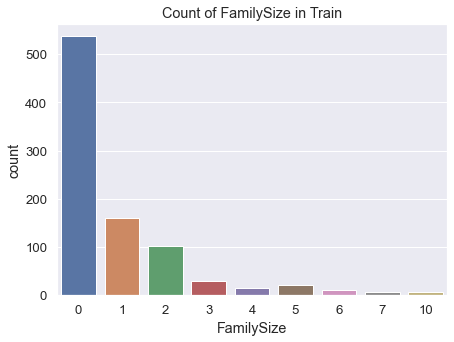

In [88]:
# Count of FamilySize in Train
plt.figure(figsize=(7,5))
sns.countplot('FamilySize', data=train)
plt.title('Count of FamilySize in Train')
plt.show()

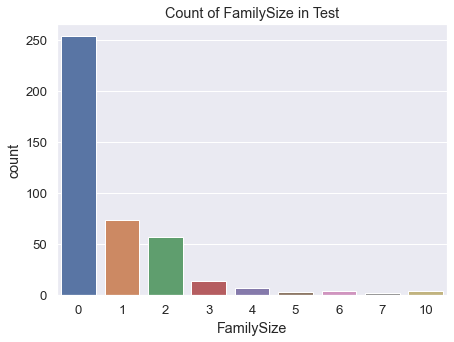

In [89]:
# Count of FamilySize in Test
plt.figure(figsize=(7,5))
sns.countplot('FamilySize', data=test)
plt.title('Count of FamilySize in Test')
plt.show()

In [90]:
# Survived Prob of FamilySize
prob_Family = train[['FamilySize', 'Survived']].groupby('FamilySize', as_index=False).mean()
prob_Family

,FamilySize,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


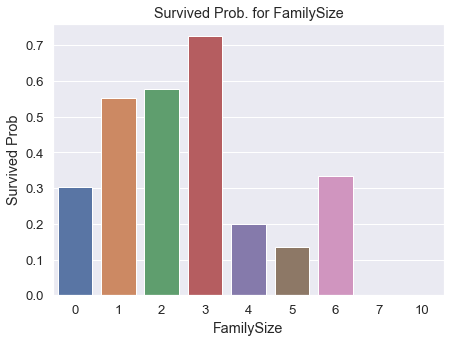

In [91]:
# Graph of Survived Prob of FamilySize
plt.figure(figsize=(7,5))
plt.title('Survived Prob. for FamilySize')
sns.barplot(x=prob_Family['FamilySize'], y=prob_Family['Survived'])
plt.ylabel('Survived Prob')
plt.show()

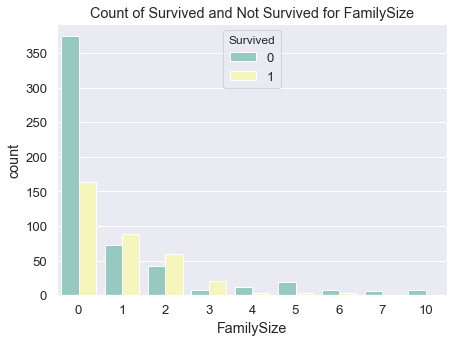

In [92]:
# Count of Survived and Not Survived for FamilySize
plt.figure(figsize=(7,5))
sns.countplot('FamilySize', hue='Survived' ,data=train, palette="Set3")
plt.title('Count of Survived and Not Survived for FamilySize')
plt.show()

<font size=4>People who are alone have lower chance to survive.</font>

In [93]:
train = train.drop(columns = ['SibSp', 'Parch'], axis=1)
test = test.drop(columns = ['SibSp', 'Parch'], axis=1)

In [94]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,male,22.0,A5,7.2500,X,S,Mr,1
1,1,1,female,38.0,PC,71.2833,C,C,Miss/Ms/Mme/Mlle/Mrs,1
2,1,3,female,26.0,STONO2,7.9250,X,S,Miss/Ms/Mme/Mlle/Mrs,0
3,1,1,female,35.0,X,53.1000,C,S,Miss/Ms/Mme/Mlle/Mrs,1
4,0,3,male,35.0,X,8.0500,X,S,Mr,0


In [95]:
test.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,3,male,34.5,X,7.8292,X,Q,Mr,0
1,3,female,47.0,X,7.0000,X,S,Miss/Ms/Mme/Mlle/Mrs,1
2,2,male,62.0,X,9.6875,X,Q,Mr,0
3,3,male,27.0,X,8.6625,X,S,Mr,0
4,3,female,22.0,X,12.2875,X,S,Miss/Ms/Mme/Mlle/Mrs,2


## 4. Encoding and Normalization

<font size=4><b>Categorical Data Encoding</b></font>

In [96]:
train_encode = train.copy()
test_encode = test.copy()

In [97]:
# Combine the train and test to encode
encode =  pd.concat(objs=[train_encode, test_encode], axis=0).reset_index(drop=True).drop(columns='Survived')

In [98]:
encode

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,3,male,22.0,A5,7.2500,X,S,Mr,1
1,1,female,38.0,PC,71.2833,C,C,Miss/Ms/Mme/Mlle/Mrs,1
2,3,female,26.0,STONO2,7.9250,X,S,Miss/Ms/Mme/Mlle/Mrs,0
3,1,female,35.0,X,53.1000,C,S,Miss/Ms/Mme/Mlle/Mrs,1
4,3,male,35.0,X,8.0500,X,S,Mr,0
...,...,...,...,...,...,...,...,...,...
1304,3,male,27.0,A5,8.0500,X,S,Mr,0
1305,1,female,39.0,PC,108.9000,C,C,Other,0
1306,3,male,38.5,SOTONOQ,7.2500,X,S,Mr,0
1307,3,male,27.0,X,8.0500,X,S,Mr,0


In [99]:
# Categorical Data Encoding
encode = pd.get_dummies(encode, columns = ['Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title'])

In [100]:
encode

,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Ticket_A,Ticket_A4,...,Cabin_G,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss/Ms/Mme/Mlle/Mrs,Title_Mr,Title_Other
0,22.0,7.2500,1,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,38.0,71.2833,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,26.0,7.9250,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,35.0,53.1000,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,35.0,8.0500,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,27.0,8.0500,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1305,39.0,108.9000,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1306,38.5,7.2500,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1307,27.0,8.0500,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [101]:
# Get back the train set after encoding
train_encode = encode[:891].reset_index(drop=True)
train_encode

,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Ticket_A,Ticket_A4,...,Cabin_G,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss/Ms/Mme/Mlle/Mrs,Title_Mr,Title_Other
0,22.0,7.2500,1,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,38.0,71.2833,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,26.0,7.9250,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,35.0,53.1000,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,35.0,8.0500,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
887,19.0,30.0000,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
888,28.0,23.4500,3,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
889,26.0,30.0000,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [102]:
# Get back the test set after encoding
test_encode = encode[891:].reset_index(drop=True)
test_encode

,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Ticket_A,Ticket_A4,...,Cabin_G,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss/Ms/Mme/Mlle/Mrs,Title_Mr,Title_Other
0,34.5,7.8292,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,47.0,7.0000,1,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,62.0,9.6875,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,27.0,8.6625,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
4,22.0,12.2875,2,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,27.0,8.0500,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
414,39.0,108.9000,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
415,38.5,7.2500,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
416,27.0,8.0500,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


<font size=4><b>Min-Max Normalization</b></font>

In [103]:
# Min-Max Normalization
def normalization(df, Feature):
    df1 = df.copy()
    df1[Feature] = (df1[Feature] - df1[Feature].min())/(df1[Feature].max() - df1[Feature].min())
    return df1

In [104]:
train_encode_norm = normalization(train_encode, ['Age', 'Fare', 'FamilySize'])

In [105]:
train_encode_norm.head()

,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Ticket_A,Ticket_A4,...,Cabin_G,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss/Ms/Mme/Mlle/Mrs,Title_Mr,Title_Other
0,0.271174,0.014151,0.1,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0.472229,0.139136,0.1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0.321438,0.015469,0.0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,0.434531,0.103644,0.1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0.434531,0.015713,0.0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [106]:
test_encode_norm = normalization(test_encode, ['Age', 'Fare', 'FamilySize'])

In [107]:
test_encode_norm.head()

,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Ticket_A,Ticket_A4,...,Cabin_G,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss/Ms/Mme/Mlle/Mrs,Title_Mr,Title_Other
0,0.452723,0.015282,0.0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0.617566,0.013663,0.1,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,0.815377,0.018909,0.0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0.353818,0.016908,0.0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0.287881,0.023984,0.2,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [108]:
# Make sure no missing data in train_encode_norm
train_encode_norm.isnull().sum().sum()

0

In [109]:
# Make sure no missing data in test_encode_norm
test_encode_norm.isnull().sum().sum()

0

## 5. Modeling

<font size=4>Random Forest Classifier, Logistic Regression, Support Vector Classifier, XGBClassifier will be examined by cross validation (K = 5) to decise the model to use.</font>

In [110]:
X = train_encode_norm.copy()
X.head()

,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Ticket_A,Ticket_A4,...,Cabin_G,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss/Ms/Mme/Mlle/Mrs,Title_Mr,Title_Other
0,0.271174,0.014151,0.1,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0.472229,0.139136,0.1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0.321438,0.015469,0.0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,0.434531,0.103644,0.1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0.434531,0.015713,0.0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [111]:
Y = train['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [112]:
# CV Score (RandomForestClassifier)
cv_score_rfc = cross_val_score(RandomForestClassifier(), X, Y, cv=5)
print(cv_score_rfc)
# Mean of CV Score (RandomForestClassifier)
mean_accuracy_rfc = sum(cv_score_rfc)/len(cv_score_rfc)
mean_accuracy_rfc = mean_accuracy_rfc*100
mean_accuracy_rfc = round(mean_accuracy_rfc, 2)
print(mean_accuracy_rfc)

[0.82122905 0.81460674 0.83707865 0.76966292 0.83707865]
81.59


In [113]:
# CV Score (Logistic Regression)
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000), X, Y, cv=5)
print(cv_score_lr)
# Mean of CV Score (Logistic Regression)
mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = mean_accuracy_lr*100
mean_accuracy_lr = round(mean_accuracy_lr, 2)
print(mean_accuracy_lr)

[0.81005587 0.81460674 0.83146067 0.80337079 0.85955056]
82.38


In [114]:
# CV Score (SVC)
cv_score_svc = cross_val_score(svm.SVC(kernel='linear'), X, Y, cv=5)
print(cv_score_svc)
# Mean of CV Score (SVC)
mean_accuracy_svc = sum(cv_score_svc)/len(cv_score_svc)
mean_accuracy_svc = mean_accuracy_svc*100
mean_accuracy_svc = round(mean_accuracy_svc, 2)
print(mean_accuracy_svc)

[0.83240223 0.82022472 0.81460674 0.78651685 0.87078652]
82.49


In [115]:
# CV Score (XGB)
cv_score_xgb = cross_val_score(XGBClassifier(), X, Y, cv=5)
print(cv_score_xgb)
# Mean of CV Score (XGB)
mean_accuracy_xgb = sum(cv_score_xgb)/len(cv_score_xgb)
mean_accuracy_xgb = mean_accuracy_xgb*100
mean_accuracy_xgb = round(mean_accuracy_xgb, 2)
print(mean_accuracy_xgb)

[03:36:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:36:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:36:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:36:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:36:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

<font size=4>Support Vector Classifier will be used to predict the test set.</font>

## 6. Prediction

In [116]:
# Hyperparameter
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid, refit = True, verbose = 3)
grid.fit(X, Y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.804, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.820, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.815, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.770, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.792, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.804, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.787, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.753, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.787, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.809, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.770, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.804, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.758, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.787, total=   0.0s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    5.3s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [117]:
# Prediction
prediction = grid.predict(test_encode_norm)

In [118]:
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [119]:
# Raw test set
test_raw = pd.read_csv('test.csv')

In [120]:
output = pd.DataFrame({'PassengerId': test_raw['PassengerId'],'Survived': prediction})
output.to_csv('submission_final.csv', index=False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


<font size=4>The final score is 0.79186.</font>